In [ ]:
pip install networkx pandas matplotlib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

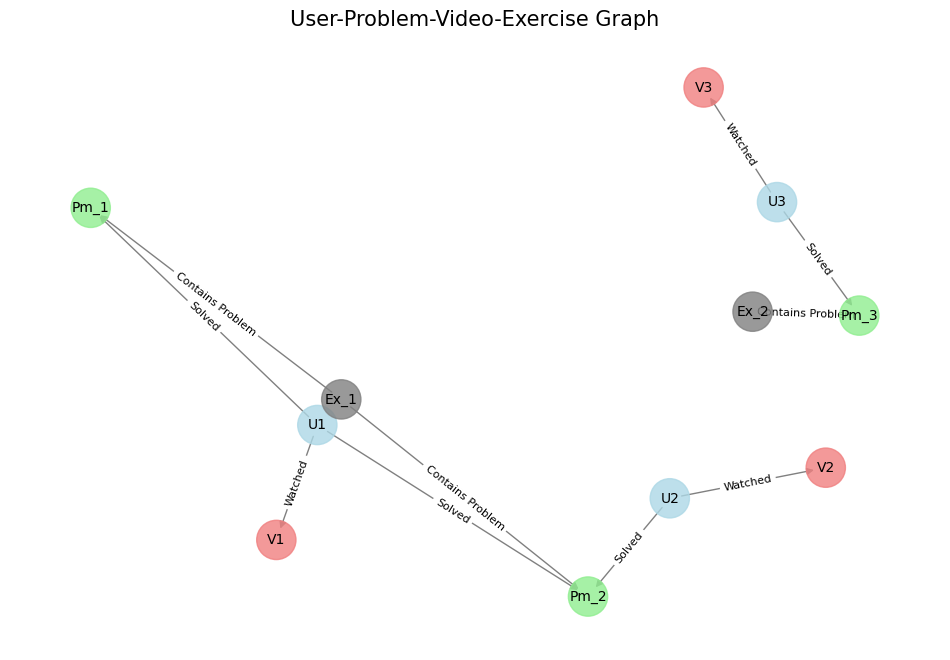

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Tải dữ liệu từ các bảng (giả định dữ liệu có sẵn dưới dạng DataFrame)
user_data = pd.DataFrame({
    'user_id': ['U1', 'U2', 'U3'],
    'name': ['Alice', 'Bob', 'Charlie'],
    'gender': ['F', 'M', 'M'],
    'school': ['School A', 'School B', 'School C'],
    'year_of_birth': [2000, 1999, 2001]
})

problem_data = pd.DataFrame({
    'id': ['Pm_1', 'Pm_2', 'Pm_3'],
    'exercise_id': ['Ex_1', 'Ex_1', 'Ex_2'],
    'score': [5.0, 3.0, 4.0],
    'type': [1, 1, 2]
})

user_problem_data = pd.DataFrame({
    'user_id': ['U1', 'U2', 'U3', 'U1'],
    'problem_id': ['Pm_1', 'Pm_2', 'Pm_3', 'Pm_2'],
    'is_correct': [1, 0, 1, 1],
    'attempts': [1, 3, 2, 1],
    'score': [5, 0, 4, 3],
    'submit_time': [1622527200, 1622603600, 1622690000, 1622607200]
})

video_data = pd.DataFrame({
    'video_id': ['V1', 'V2', 'V3'],
    'user_id': ['U1', 'U2', 'U3'],
    'start_point': [0.0, 30.0, 50.0],
    'end_point': [120.0, 90.0, 150.0],
    'speed': [1.0, 1.5, 2.0],
    'local_start_time': [1622523600, 1622600000, 1622686400]
})

# Tạo đồ thị
G = nx.MultiDiGraph()  # Directed Graph for relationships

# Thêm nút cho User
for _, row in user_data.iterrows():
    G.add_node(row['user_id'], label='User', name=row['name'], gender=row['gender'], school=row['school'])

# Thêm nút cho Problem
for _, row in problem_data.iterrows():
    G.add_node(row['id'], label='Problem', exercise_id=row['exercise_id'], score=row['score'], type=row['type'])

# Thêm nút cho Video
for _, row in video_data.iterrows():
    G.add_node(row['video_id'], label='Video')

# Thêm cạnh từ User → Problem
for _, row in user_problem_data.iterrows():
    G.add_edge(row['user_id'], row['problem_id'], label='Solved', is_correct=row['is_correct'],
               attempts=row['attempts'], score=row['score'], submit_time=row['submit_time'])

# Thêm cạnh từ User → Video
for _, row in video_data.iterrows():
    G.add_edge(row['user_id'], row['video_id'], label='Watched', start_point=row['start_point'],
               end_point=row['end_point'], speed=row['speed'], local_start_time=row['local_start_time'])

# Thêm cạnh từ Exercise → Problem
for _, row in problem_data.iterrows():
    G.add_edge(row['exercise_id'], row['id'], label='Contains Problem')


# Visualize the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Positioning the graph

# Đảm bảo mỗi nút được thêm với thuộc tính 'label' mặc định nếu không có
for node in G.nodes:
    if 'label' not in G.nodes[node]:
        G.nodes[node]['label'] = 'Unknown'  # Gán giá trị mặc định nếu thiếu

# Node colors
node_colors = []
for node, data in G.nodes(data=True):
    if data['label'] == 'User':
        node_colors.append('lightblue')
    elif data['label'] == 'Problem':
        node_colors.append('lightgreen')
    elif data['label'] == 'Video':
        node_colors.append('lightcoral')
    elif data['label'] == 'Exercise':
        node_colors.append('orange')
    else:
        node_colors.append('gray')

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800, alpha=0.8)
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>', edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10)

# Show edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Show the graph
plt.title("User-Problem-Video-Exercise Graph", fontsize=15)
plt.axis('off')
plt.show()


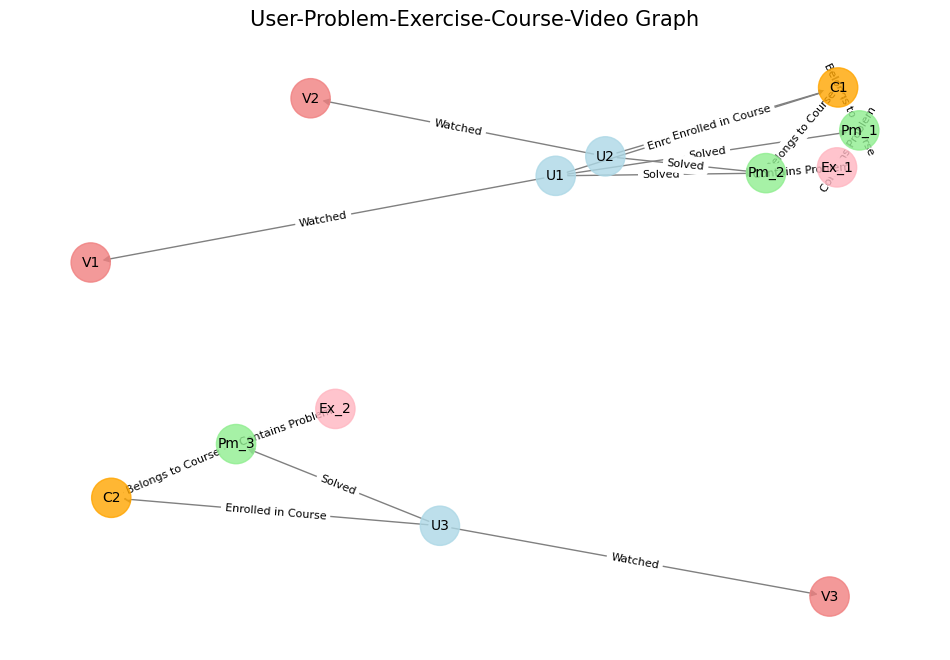

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Tạo dữ liệu mẫu
user_data = pd.DataFrame({
    'user_id': ['U1', 'U2', 'U3'],
    'name': ['Alice', 'Bob', 'Charlie'],
    'gender': ['F', 'M', 'M'],
    'school': ['School A', 'School B', 'School C'],
    'year_of_birth': [2000, 1999, 2001]
})

problem_data = pd.DataFrame({
    'id': ['Pm_1', 'Pm_2', 'Pm_3'],
    'exercise_id': ['Ex_1', 'Ex_1', 'Ex_2'],
    'score': [5.0, 3.0, 4.0],
    'type': [1, 1, 2]
})

exercise_data = pd.DataFrame({
    'exercise_id': ['Ex_1', 'Ex_2'],
    'title': ['Algebra Basics', 'Geometry Basics']
})

course_data = pd.DataFrame({
    'course_id': ['C1', 'C2'],
    'name': ['Math 101', 'Science 102']
})

problem_course_data = pd.DataFrame({
    'problem_id': ['Pm_1', 'Pm_2', 'Pm_3'],
    'course_id': ['C1', 'C1', 'C2']
})

user_problem_data = pd.DataFrame({
    'user_id': ['U1', 'U2', 'U3', 'U1'],
    'problem_id': ['Pm_1', 'Pm_2', 'Pm_3', 'Pm_2'],
    'is_correct': [1, 0, 1, 1],
    'attempts': [1, 3, 2, 1],
    'score': [5, 0, 4, 3],
    'submit_time': [1622527200, 1622603600, 1622690000, 1622607200]
})

user_course_data = pd.DataFrame({
    'user_id': ['U1', 'U2', 'U3'],
    'course_id': ['C1', 'C1', 'C2']
})

video_data = pd.DataFrame({
    'video_id': ['V1', 'V2', 'V3'],
    'user_id': ['U1', 'U2', 'U3'],
    'start_point': [0.0, 30.0, 50.0],
    'end_point': [120.0, 90.0, 150.0],
    'speed': [1.0, 1.5, 2.0],
    'local_start_time': [1622523600, 1622600000, 1622686400]
})

# Tạo đồ thị
G = nx.MultiDiGraph()

# Thêm nút cho User
for _, row in user_data.iterrows():
    G.add_node(row['user_id'], label='User', name=row['name'], gender=row['gender'], school=row['school'])

# Thêm nút cho Problem
for _, row in problem_data.iterrows():
    G.add_node(row['id'], label='Problem', exercise_id=row['exercise_id'], score=row['score'], type=row['type'])

# Thêm nút cho Exercise
for _, row in exercise_data.iterrows():
    G.add_node(row['exercise_id'], label='Exercise', title=row['title'])

# Thêm nút cho Course
for _, row in course_data.iterrows():
    G.add_node(row['course_id'], label='Course', name=row['name'])

# Thêm nút cho Video
for _, row in video_data.iterrows():
    G.add_node(row['video_id'], label='Video')

# Thêm cạnh từ User → Problem
for _, row in user_problem_data.iterrows():
    G.add_edge(row['user_id'], row['problem_id'], label='Solved', is_correct=row['is_correct'],
               attempts=row['attempts'], score=row['score'], submit_time=row['submit_time'])

# Thêm cạnh từ Exercise → Problem
for _, row in problem_data.iterrows():
    G.add_edge(row['exercise_id'], row['id'], label='Contains Problem')

# Thêm cạnh từ Problem → Course
for _, row in problem_course_data.iterrows():
    G.add_edge(row['problem_id'], row['course_id'], label='Belongs to Course')

# Thêm cạnh từ User → Course
for _, row in user_course_data.iterrows():
    G.add_edge(row['user_id'], row['course_id'], label='Enrolled in Course')

# Thêm cạnh từ User → Video
for _, row in video_data.iterrows():
    G.add_edge(row['user_id'], row['video_id'], label='Watched', start_point=row['start_point'],
               end_point=row['end_point'], speed=row['speed'], local_start_time=row['local_start_time'])

# Vẽ đồ thị
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)

node_colors = []
for node, data in G.nodes(data=True):
    if data['label'] == 'User':
        node_colors.append('lightblue')
    elif data['label'] == 'Problem':
        node_colors.append('lightgreen')
    elif data['label'] == 'Exercise':
        node_colors.append('lightpink')
    elif data['label'] == 'Course':
        node_colors.append('orange')
    elif data['label'] == 'Video':
        node_colors.append('lightcoral')
    else:
        node_colors.append('gray')

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800, alpha=0.8)
nx.draw_networkx_edges(G, pos, arrows=True, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10)

edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("User-Problem-Exercise-Course-Video Graph", fontsize=15)
plt.axis('off')
plt.show()


In [ ]:
# Đọc dữ liệu từ các tệp CSV
problem_data = pd.read_csv('/content/drive/MyDrive/Học Kì 7/Mạng xã hội/problem_cleaned.csv')
user_data = pd.read_csv('/content/drive/MyDrive/Học Kì 7/Mạng xã hội/user_cleaned.csv')
user_problem_data = pd.read_csv('/content/drive/MyDrive/Học Kì 7/Dữ liệu lớn Big Data/user_problem_cleaned.csv')
video_data = pd.read_csv('/content/drive/MyDrive/Học Kì 7/Dữ liệu lớn Big Data/user_video_cleaned.csv')


In [ ]:
print(problem_data.columns)


Index(['problem_id', 'content', 'option', 'answer', 'score', 'type',
       'typetext', 'location', 'context_id', 'exercise_id'],
      dtype='object')


In [ ]:
print(user_data.columns)


Index(['user_id', 'name', 'course_order'], dtype='object')


In [ ]:
print(video_data.columns)

Index(['seq', 'user_id'], dtype='object')


In [ ]:
# Tạo đồ thị
G = nx.MultiDiGraph()


# Tạo nút cho User
for _, row in user_data.iterrows():
    G.add_node(row['user_id'], label='User', name=row['name'], course_order=row['course_order'])



# Thêm nút cho Problem
for _, row in problem_data.iterrows():
    G.add_node(row['problem_id'], label='Problem', exercise_id=row['exercise_id'], score=row['score'], type=row['type'])

# Thêm nút cho Exercise
for _, row in exercise_data.iterrows():
    G.add_node(row['exercise_id'], label='Exercise', title=row['title'])

# Thêm nút cho Course
for _, row in course_data.iterrows():
    G.add_node(row['course_id'], label='Course', name=row['name'])

# Thêm nút cho Video
for _, row in video_data.iterrows():
    G.add_node(row['seq'], label='Video')  # Sử dụng 'seq' thay cho 'video_id'


In [ ]:
print(user_problem_data.columns)


Index(['log_id', 'problem_id', 'user_id', 'is_correct', 'attempts', 'score'], dtype='object')


In [ ]:
# Thêm cạnh từ User → Problem
for _, row in user_problem_data.iterrows():
    G.add_edge(row['user_id'], row['problem_id'], label='Solved', is_correct=row['is_correct'],
               attempts=row['attempts'], score=row['score'], submit_time=row['submit_time'])

# Thêm cạnh từ Problem → Course
for _, row in problem_course_data.iterrows():
    G.add_edge(row['problem_id'], row['course_id'], label='Belongs to Course')

# Thêm cạnh từ User → Course
for _, row in user_course_data.iterrows():
    G.add_edge(row['user_id'], row['course_id'], label='Enrolled in Course')
    # Thêm cạnh từ User → Video
for _, row in video_data.iterrows():
    G.add_edge(row['user_id'], f"Video_{row['user_id']}", label='Watched', seq=row.get('seq', 'Unknown'))


In [ ]:
# Thêm cạnh từ Exercise → Problem
for _, row in problem_data.iterrows():
    G.add_edge(row['exercise_id'], row['problem_id'], label='Contains Problem')


In [ ]:


# Vẽ đồ thị
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)

node_colors = []
for node, data in G.nodes(data=True):
    if data['label'] == 'User':
        node_colors.append('lightblue')
    elif data['label'] == 'Problem':
        node_colors.append('lightgreen')
    elif data['label'] == 'Exercise':
        node_colors.append('lightpink')
    elif data['label'] == 'Course':
        node_colors.append('orange')
    elif data['label'] == 'Video':
        node_colors.append('lightcoral')
    else:
        node_colors.append('gray')

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800, alpha=0.8)
nx.draw_networkx_edges(G, pos, arrows=True, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10)

edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("User-Problem-Exercise-Course-Video Graph", fontsize=15)
plt.axis('off')
plt.show()


KeyboardInterrupt: 

<Figure size 1200x800 with 0 Axes>